# Modélisation de Fashion MNIST

Fashion-MNIST est une base de données de vêtements proche de MNIST.

Voici où le trouver : https://github.com/zalandoresearch/fashion-mnist
    
    
Il est disponible dans Keras

# Lire les données

Il existe 10 classes d'images différentes, comme suit:

0: T-shirt / top;
1: pantalon;
2: pull-over;
3: robe;
4: manteau;
5: sandale;
6: chemise;
7: baskets;
8: sac;
9: bottine.

Les dimensions de l’image sont 28x28.

In [7]:
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels_trans = to_categorical(train_labels)
test_labels_trans = to_categorical(test_labels)

In [16]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [17]:
import pandas as pd
# Create a dictionary for each type of label 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    # Get the count for each label
    label_counts = pd.Series(data).value_counts()

    # Get total number of samples
    total_samples = len(data)


    # Count the number of items in each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_labels)

Ankle Boot          :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Shirt               :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Coat                :   6000 or 10.0%
Dress               :   6000 or 10.0%
Pullover            :   6000 or 10.0%
Trouser             :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%


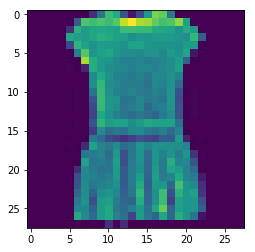

In [46]:
plt.imshow(train_images[3].reshape([28,28]))

# Construire votre réseau de neurones à convolutions